Построение гистограммы для букв...


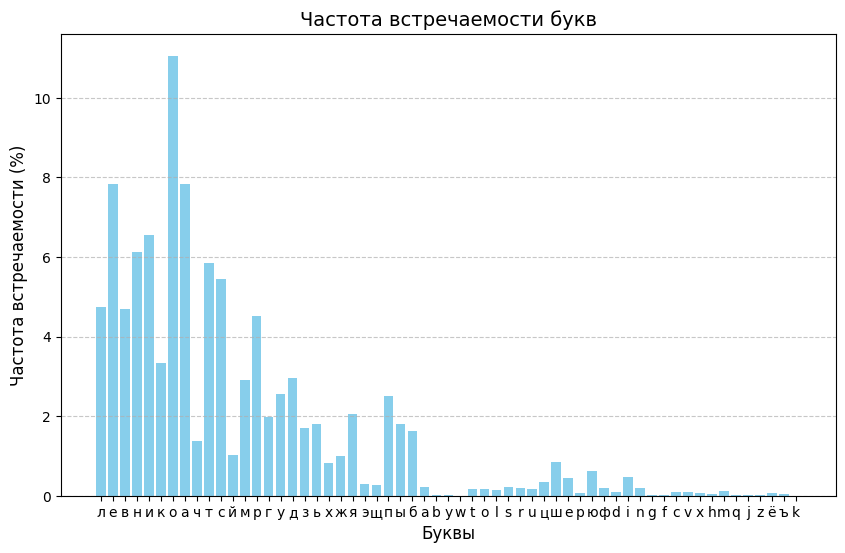

Построение гистограммы для слов...


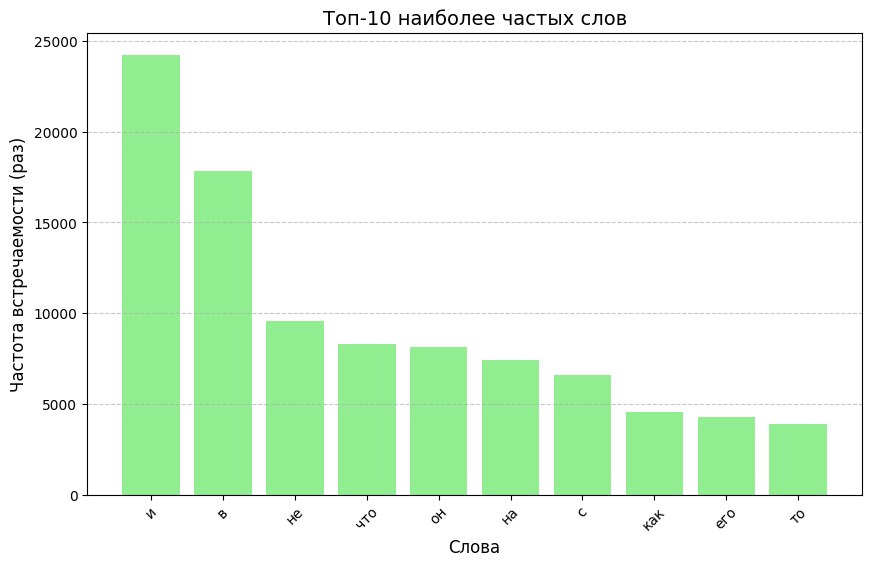

In [3]:
import re
from collections import Counter
import pandas as pd
from docx import Document
import matplotlib.pyplot as plt

# Функция для чтения текста из .docx файла
def read_docx(file_path):
    doc = Document(file_path)
    text = []
    for paragraph in doc.paragraphs:
        text.append(paragraph.text)
    return "\n".join(text)

# Функция для анализа текста
def analyze_text_from_docx(file_path):
    text = read_docx(file_path).lower()
    
    # Удаление лишних символов и разделение на слова
    words = re.findall(r'\b\w+\b', text)
    
    # Подсчет частоты слов
    word_count = Counter(words)
    total_words = sum(word_count.values())
    
    # Подсчет частоты букв
    letters = re.findall(r'[а-яёa-z]', text)  # Подходит для русского и английского текста
    letter_count = Counter(letters)
    total_letters = sum(letter_count.values())
    
    # Форматирование таблицы по словам
    word_stats = [
        {"Слово": word, "Частота встреч в раз": count, "Частота встреч в %": round((count / total_words) * 100, 2)}
        for word, count in word_count.items()
    ]
    word_df = pd.DataFrame(word_stats)
    
    # Форматирование таблицы по буквам
    letter_stats = [
        {"Буква": letter, "Частота встреч в раз": count, "Частота встреч в %": round((count / total_letters) * 100, 2)}
        for letter, count in letter_count.items()
    ]
    letter_df = pd.DataFrame(letter_stats)
    
    return word_df, letter_df

# Функция для построения гистограммы частоты букв
def plot_letter_histogram(letter_df):
    plt.figure(figsize=(10, 6))
    plt.bar(letter_df["Буква"], letter_df["Частота встреч в %"], color="skyblue")
    plt.xlabel("Буквы", fontsize=12)
    plt.ylabel("Частота встречаемости (%)", fontsize=12)
    plt.title("Частота встречаемости букв", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Функция для построения гистограммы частоты слов
def plot_word_histogram(word_df, top_n=10):
    # Сортировка по частоте и выбор top_n слов
    top_words = word_df.sort_values(by="Частота встреч в раз", ascending=False).head(top_n)
    
    plt.figure(figsize=(10, 6))
    plt.bar(top_words["Слово"], top_words["Частота встреч в раз"], color="lightgreen")
    plt.xlabel("Слова", fontsize=12)
    plt.ylabel("Частота встречаемости (раз)", fontsize=12)
    plt.title(f"Топ-{top_n} наиболее частых слов", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Основной код
file_path = "lion.docx"  # Укажите имя вашего .docx файла
word_df, letter_df = analyze_text_from_docx(file_path)

# Построение гистограмм
print("Построение гистограммы для букв...")
plot_letter_histogram(letter_df)

print("Построение гистограммы для слов...")
plot_word_histogram(word_df, top_n=10)